In [1]:
from ultralytics import YOLO
import torchvision
from wrapper import Wrapper
import onnxruntime
import matplotlib.pyplot as plt

inf_session = onnxruntime.InferenceSession('yolov8n_wrapped.onnx')

img = torchvision.io.read_image('test2.png', torchvision.io.ImageReadMode.RGB).permute((1,2,0)).unsqueeze(0)

output = inf_session.run(
    None,
    {'image': img.numpy()}
)
print(output)

2023-04-06 16:42:53.512699670 [E:onnxruntime:, sequential_executor.cc:494 ExecuteKernel] Non-zero status code returned while running Expand node. Name:'/Expand' Status Message: invalid expand shape


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Non-zero status code returned while running Expand node. Name:'/Expand' Status Message: invalid expand shape

In [16]:
img[0,0]

tensor([[  4,  10,   1],
        [  2,   8,   0],
        [  5,  10,   6],
        ...,
        [213, 255, 255],
        [214, 255, 255],
        [214, 255, 255]], dtype=torch.uint8)

torch.Size([1, 3, 1920, 1920])


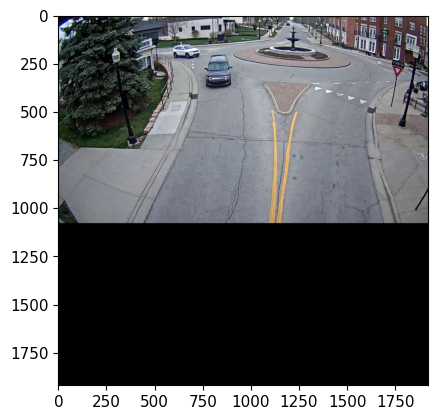

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

img_processed = Wrapper.preprocess(img)
print(img_processed.shape)

plt.imshow(img_processed.squeeze(0).permute((1,2,0)))
plt.show()

In [3]:
yolo = YOLO('yolov8n.pt', task='detect')

yolo.model(img_processed)

wrapper = Wrapper(yolo.model).eval()


In [4]:
from torchvision.utils import draw_bounding_boxes


In [5]:
import torch

In [6]:
output = wrapper.forward(img)

labels = [yolo.names[int(class_id)] for class_id in output[:, 5]]
boxes = output[:, :4]



img_label = (img_processed.squeeze(0) * 255).to(torch.uint8)

img_copy = draw_bounding_boxes(img_label, boxes, width=4, labels=labels)



In [7]:
torchvision.io.write_jpeg(img_copy, 'out.jpg')

In [13]:
[yolo.names[int(class_id)] for conf, class_id in output[:, 4:]]

['car', 'car', 'parking meter']

In [18]:
img_label.shape

torch.Size([3, 1920, 1920])

In [9]:
import json
with open('yolo_classes.json', 'w') as f:
  json.dump(YOLO().names, f)